In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=75
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Arial'})

In [40]:
fitDF = pd.read_csv('Fitting/mirnn/mirnn_fit.csv')
colors = list(mpl.colors.TABLEAU_COLORS)

In [24]:
compileDF = pd.read_csv('Data/arc_allcomm.csv')
compileDF.to_csv('Data/arc_commmono.csv', mode='w', index=False, header=True)

addDF = pd.read_csv('Data/arc_allmono.csv')
addDF.to_csv('Data/arc_commmono.csv', mode='a', index=False, header=False)




In [41]:
rawdataDF = pd.read_csv('Data/arc_commmono.csv')

In [42]:
AllSpecies = ['AC','BA','BC','BL','BT','BV','CC','DF','wt','delarc','parc-','parc+']
AllConditions = ['mono','comm11wtaTc','comm11delarcaTc','comm11parc','comm11parcaTc']
ConditionNames = ['Mono','Comm WT','Comm delarc','Comm parc-','Comm parc+']


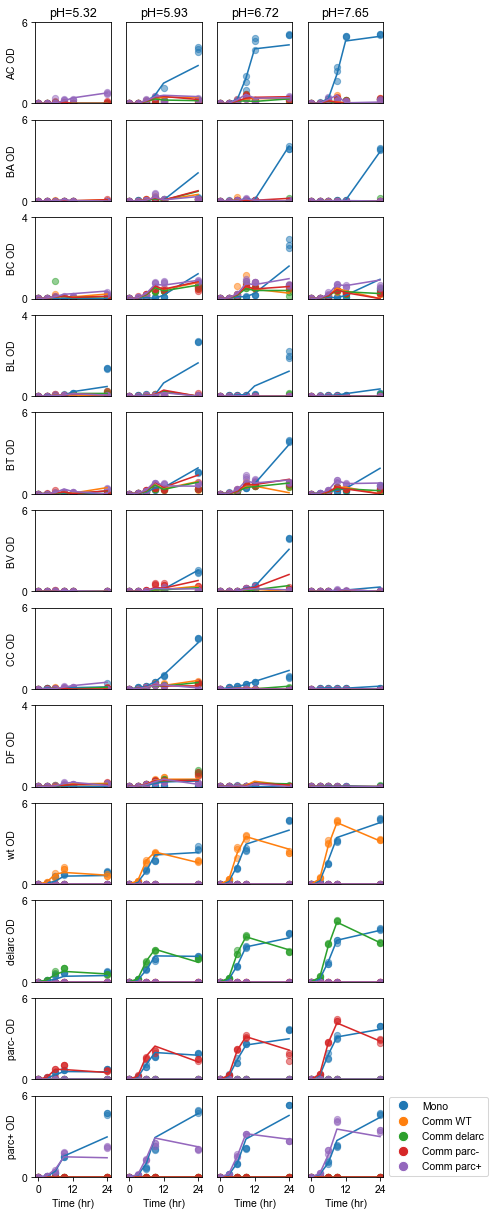

In [28]:
fig,ax = plt.subplots(len(AllSpecies),4, figsize=(6,20))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])
RawDataExp = list(rawdataDF['Experiments'])

for spnum,species in enumerate(AllSpecies):
    for pHnum,pH in enumerate([5,6,7,8]):
        for condnum,cond in enumerate(AllConditions):
            Exp = str(pH)+cond
            if cond == 'mono':
                Exp = species+'_pH'+str(pH)


            Expnum = AllExp.index(Exp)
            
            Exptime = [0,3,6,9,12,24]
            
            
            #true = list(fitDF[species+'_OD true'])[Expnum:Expnum+6]
            
            if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':
                Exptime = [0,3,6,9,24]
            
            pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]
            
            for rep in range(3):
                if cond == 'mono':
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
                else:
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep+1))
                true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
                ax[spnum][pHnum].scatter(Exptime,true,c=colors[condnum],alpha=0.5)
            ax[spnum][pHnum].plot(Exptime,pred,c=colors[condnum])
            
            ymax = 6
            
            if species == 'BC' or species == 'BL' or species == 'DF':
                ymax = 4
            
            ax[spnum][pHnum].set_ylim((0,ymax))
            ax[spnum][pHnum].set_yticks([])
            ax[spnum][pHnum].set_xticks([])
            
            

species_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[0],markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[1],markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[2],markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[3],markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[4],markerfacecolor=colors[4], markersize=10),
    
    ]

plt.legend(handles=species_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

for spnum,species in enumerate(AllSpecies):
    ax[spnum][0].set_ylabel(species+' OD')
    
    ymax = 6
            
    if species == 'BC' or species == 'BL' or species == 'DF':
        ymax = 4
    ax[spnum][0].set_yticks([0,ymax])
    
for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
    ax[0][pHnum].set_title('pH='+str(pH))
    ax[-1][pHnum].set_xticks([0,12,24])
    ax[-1][pHnum].set_xlabel('Time (hr)')
    
plt.savefig('Figures/mirnn/MiRNN_timeseries_fit.svg')

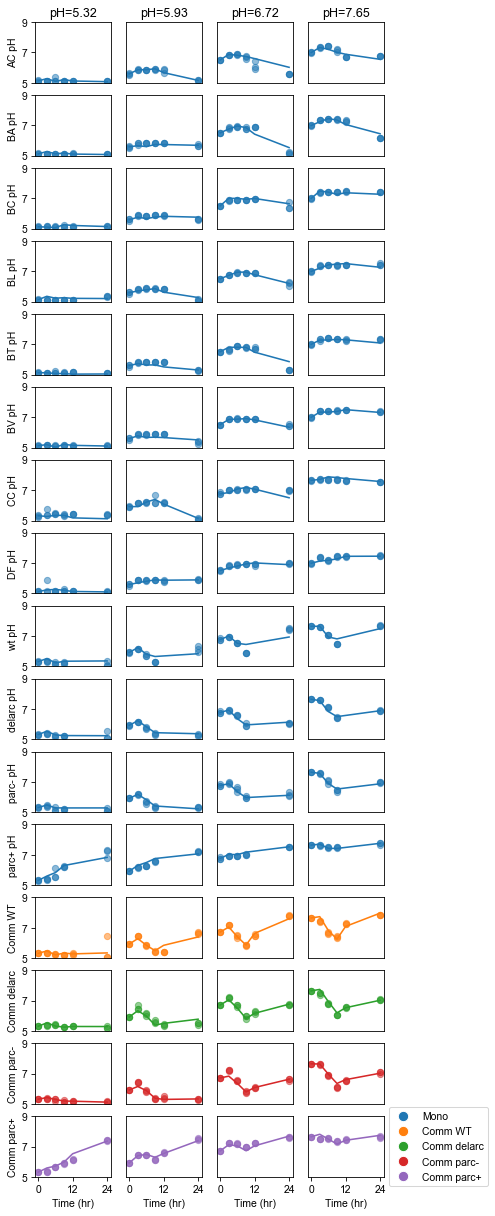

In [10]:
fig,ax = plt.subplots(len(AllSpecies)+4,4, figsize=(6,20))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])

for spnum,species in enumerate(AllSpecies):
    for pHnum,pH in enumerate([5,6,7,8]):
        cond == 'mono'
        Exp = species+'_pH'+str(pH)
        
        Expnum = AllExp.index(Exp)
        Exptime = [0,3,6,9,12,24]

        
        if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':           
            Exptime = [0,3,6,9,24]
        
        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]

        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[spnum][pHnum].scatter(Exptime,true,c=colors[0],alpha=0.5)
        ax[spnum][pHnum].plot(Exptime,pred,c=colors[0])

        ax[spnum][pHnum].set_ylim((5,9))
        ax[spnum][pHnum].set_yticks([])
        ax[spnum][pHnum].set_xticks([])
        


for condnum,cond in enumerate(AllConditions):
    for pHnum,pH in enumerate([5,6,7,8]):
        Exp = str(pH)+cond
        if cond == 'mono' or cond == 'comm':
            continue

        Expnum = AllExp.index(Exp)
        Exptime = [0,3,6,9,12,24]



        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]
        
        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep+1))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[condnum+len(AllSpecies)-1][pHnum].scatter(Exptime,true,c=colors[condnum],alpha=0.5)
        ax[condnum+len(AllSpecies)-1][pHnum].plot(Exptime,pred,c=colors[condnum])

        ax[condnum+len(AllSpecies)-1][pHnum].set_ylim((5,9))
        ax[condnum+len(AllSpecies)-1][pHnum].set_yticks([])
        ax[condnum+len(AllSpecies)-1][pHnum].set_xticks([])
            
            

species_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[0],markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[1],markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[2],markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[3],markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[4],markerfacecolor=colors[4], markersize=10),
    #Line2D([0], [0], marker='o', color='w', label=ConditionNames[5],markerfacecolor=colors[5], markersize=10),
    
    ]

plt.legend(handles=species_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

for spnum,species in enumerate(AllSpecies):
    ax[spnum][0].set_ylabel(species+' pH')
    ax[spnum][0].set_yticks([5,7,9])

for condnum,cond in enumerate(AllConditions):
    
    if cond == 'mono' or cond == 'comm':
        continue
    ax[condnum+len(AllSpecies)-1][0].set_ylabel(ConditionNames[condnum])
    ax[condnum+len(AllSpecies)-1][0].set_yticks([5,7,9])
    
for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
    ax[0][pHnum].set_title('pH='+str(pH))
    ax[-1][pHnum].set_xticks([0,12,24])
    ax[-1][pHnum].set_xlabel('Time (hr)')
    
#plt.savefig('Figures/mirnn/MiRNN_timeseries_fit_pH.svg')

/var/folders/c2/p6l4gf2935z26c2jq5cy44b00000gn/T/ipykernel_48043/1827373895.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(avgOD,MSE, c=colordict[species+'_OD'])


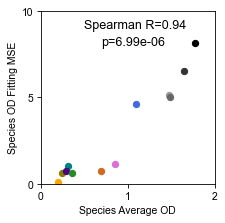

In [45]:
#species OD MSE vs average species OD

colordict = {
        'BA_OD':'teal',
        'BL_OD':'olive',
        'BC_OD':'chocolate',
        'BT_OD':'orchid',
        'BV_OD':'indigo',
        'AC_OD':'royalblue',
        'CC_OD':'forestgreen',
        'DF_OD':'orange',
        'wt_OD':(0.2,0.2,0.2),
        'delarc_OD':(0.6,0.6,0.6),
        'parc-_OD':(0.4,0.4,0.4),
        'parc+_OD':(0,0,0),
        }

fig,ax = plt.subplots(figsize=(3,3))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])
RawDataExp = list(rawdataDF['Experiments'])

allMSE=[]
allavgOD = []
for spnum,species in enumerate(AllSpecies):
    allspODtrue = []
    allspODpred = []
    
    for pHnum,pH in enumerate([5,6,7,8]):
        for condnum,cond in enumerate(AllConditions):
            Exp = str(pH)+cond
            if cond == 'mono':
                Exp = species+'_pH'+str(pH)


            Expnum = AllExp.index(Exp)
            
            Exptime = [0,3,6,9,12,24]
            
            
            #true = list(fitDF[species+'_OD true'])[Expnum:Expnum+6]
            
            if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':
                Exptime = [0,3,6,9,24]
            
            pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]
            
            repOD = []
            for rep in range(3):
                if cond == 'mono':
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
                else:
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep+1))
                true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
                repOD.append(true)
            avgrepOD = [sum(x) for x in zip(repOD[0],repOD[1],repOD[2])]
            
            allspODtrue.extend(avgrepOD)
            allspODpred.extend(pred)
    
    avgOD = sum(allspODtrue)/len(allspODtrue)
    allavgOD.append(avgOD)
    
    MSE = np.square(np.subtract(allspODtrue,allspODpred)).mean() 
    allMSE.append(MSE)
    
    plt.scatter(avgOD,MSE, c=colordict[species+'_OD'])
    
plt.ylim((0,10))
plt.xlim((0,2))

plt.yticks([0,5,10])
plt.xticks([0,1,2])

plt.ylabel('Species OD Fitting MSE')
plt.xlabel('Species Average OD')

r,p=stats.spearmanr(allavgOD,allMSE) #spearman correlation
plt.text(0.5,9,'Spearman R='+str(round(r,2)),fontsize=12)
plt.text(0.7,8,'p=%.2e' %p,fontsize=12)
plt.savefig('Figures/mirnn/avgOD_vs_MSE.svg')

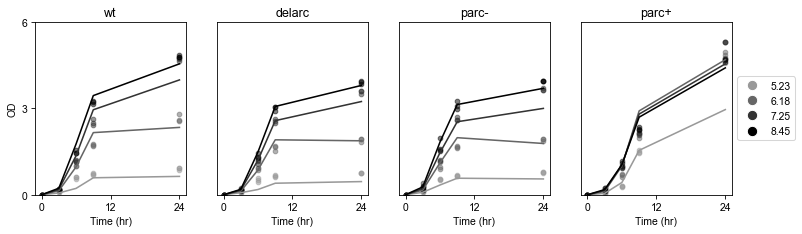

In [21]:
#plot monoculture fit of delarc and parc+

species_pH_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label='OD',markerfacecolor='tab:blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='pH',markerfacecolor='tab:orange', markersize=10),
    
    ]

AllSpecies = ['wt','delarc','parc-','parc+']
pHtopHcolor = {
    '5':'0.6',
    '6':'0.4',
    '7':'0.2',
    '8':'0',
}


pH_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label='5.23',
                          markerfacecolor='0.6', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='6.18',
                          markerfacecolor='0.4', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='7.25',
                          markerfacecolor='0.2', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='8.45',
                          markerfacecolor='0', markersize=10),
]

fig,ax = plt.subplots(1,4, figsize=(12,3))
for spnum,species in enumerate(AllSpecies):
    
    for pHnum,pH in enumerate([5,6,7,8]):
        cond = 'mono'
        Exp = species+'_pH'+str(pH)
        
        Expnum = AllExp.index(Exp)
            
        Exptime = [0,3,6,9,24]

        pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]

        for rep in range(3):
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[spnum].scatter(Exptime,true,color=pHtopHcolor[str(pHnum+5)],alpha=0.5,s=20)
        ax[spnum].plot(Exptime,pred,color=pHtopHcolor[str(pHnum+5)],markersize=8)

        ax[spnum].set_ylim((0,6))
        ax[spnum].set_yticks([])
        ax[spnum].set_xticks([])
        
        

    ax[0].set_ylabel('OD')
    ax[0].set_yticks([0,3,6])


    ax[spnum].set_title(species)
    ax[spnum].set_xticks([0,12,24])
    ax[spnum].set_xlabel('Time (hr)')

plt.legend(handles=pH_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))
        
plt.savefig('Figures/mirnn/EC_OD_fit.svg')
    
        

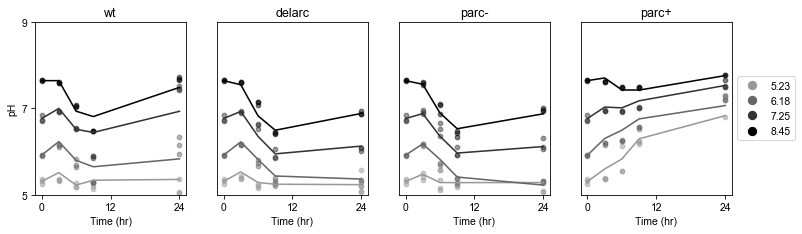

In [22]:
#plot monoculture fit of delarc and parc+

species_pH_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label='OD',markerfacecolor='tab:blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='pH',markerfacecolor='tab:orange', markersize=10),
    
    ]

AllSpecies = ['wt','delarc','parc-','parc+']
pHtopHcolor = {
    '5':'0.6',
    '6':'0.4',
    '7':'0.2',
    '8':'0',
}

fig,ax = plt.subplots(1,4, figsize=(12,3))
for spnum,species in enumerate(AllSpecies):
    
    for pHnum,pH in enumerate([5,6,7,8]):
        cond = 'mono'
        Exp = species+'_pH'+str(pH)
        
        Expnum = AllExp.index(Exp)
            
        Exptime = [0,3,6,9,24]

#         pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]

#         for rep in range(3):
#             rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
#             true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
#             ax[spnum].scatter(Exptime,true,color=pHtopHcolor[str(pHnum+5)],alpha=0.5,s=5)
#         ax[spnum].plot(Exptime,pred,color=pHtopHcolor[str(pHnum+5)],marker='o',markersize=8)

#         ax[spnum].set_ylim((0,6))
#         ax[spnum].set_yticks([])
#         ax[spnum].set_xticks([])
        
        
        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]

        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[spnum].scatter(Exptime,true,color=pHtopHcolor[str(pHnum+5)],alpha=0.5,s=20)
        ax[spnum].plot(Exptime,pred,color=pHtopHcolor[str(pHnum+5)],markersize=8)

        ax[spnum].set_ylim((5,9))
        ax[spnum].set_yticks([])
        ax[spnum].set_xticks([])
        
        
    ax[0].set_ylabel('pH')
    ax[0].set_yticks([5,7,9])


    ax[spnum].set_title(species)
    ax[spnum].set_xticks([0,12,24])
    ax[spnum].set_xlabel('Time (hr)')

plt.legend(handles=pH_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))
        
plt.savefig('Figures/mirnn/EC_pH_fit.svg')
    
        